[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Pierchala_et_al_2022/fig_3.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=examples/PySDM_examples/Pierchala_et_al_2022/fig_3.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Pierchala_et_al_2022/fig_3.ipynb)

### based on Fig. 3 from Pierchala et al. 2020 (Geochim. Cosmochim. Acta) "_Quantiﬁcation the diﬀusion-induced fractionation of $^{1}H_{2} ^{17}O$ isotopologue in air accompanying the process of water evaporation_" (https://doi.org/10.1016/j.gca.2022.01.020)

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [5]:
import numpy as np
from matplotlib import pyplot
from PySDM import Formulae
from PySDM.physics import si
from open_atmos_jupyter_utils import show_plot

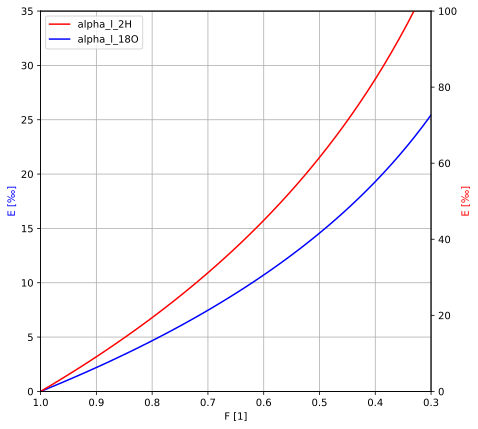

HTML(value="<a href='./fig_3.pdf' target='_blank'>./fig_3.pdf</a><br>")

In [7]:
""" fitted kinetic enrichment coeffs from Table 2 """
eps_kin = {
    "HDO":    9.50e-3,
    "H218O": 11.45e-3,
    "H217O":  5.88e-3,
}
F = np.linspace(1, .3)
T = (273.15 + 20.36) * si.K

def E(F, paper, isotopologue, T, alpha_kin):
    formulae = Formulae(isotope_equilibrium_fractionation_factors=paper)
    alpha_eq = getattr(formulae.isotope_equilibrium_fractionation_factors, isotopologue)(T=T)
    alpha_eff = alpha_eq * alpha_kin
    return F**(1/alpha_eff - 1) - 1

_, axl = pyplot.subplots(figsize=(7, 7))
axr = axl.twinx()
plots = []
for paper, isotopologue, color, eps_key, ax in {
    ('HoritaAndWesolowski1994', 'alpha_l_18O', 'blue', 'H218O', axl), 
    ('HoritaAndWesolowski1994', 'alpha_l_2H', 'red', 'HDO', axr), 
}:
    plots += ax.plot(
        F,
        1e3 * E(F, paper, isotopologue, T=T, alpha_kin=1+eps_kin[eps_key]),
        label=isotopologue,
        color=color
    )
    ax.set_ylabel(u"E [‰]", color=color)

pyplot.legend(plots, [l.get_label() for l in plots])
pyplot.xlim(*F[[0, -1]])
axl.grid(None)
axl.set_ylim(0, 35)
axr.set_ylim(0, 100)
axl.set_xlabel("F [1]")
show_plot("fig_3.pdf")